In [1]:
import sys
sys.path.insert(0,"../pyphasefield-develop_sp/pyphasefield/")
import pyphasefield.Engines as engines
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import pandas as pd


#not using moving frame
def run_sim(x, ts, N,M):
    sim = engines.FID(dimensions=[N, M])
    sim.set_framework("GPU_SERIAL") 
    sim.set_dx(x) #
    sim.set_dt(1.0e-11) #
    sim.set_time_step_counter(0)
    sim.set_save_path("mf") ##
    sim.set_autosave_flag(True)
    sim.set_autosave_save_images_flag(True)
    sim.set_autosave_rate(500000) # 
    sim.set_boundary_conditions(["NEUMANN", "NEUMANN"])
    
    data = {
        "P":0.01, #
        "mu": 3.15e-8, #int mobility
        "Vs":0.1, #solicification vel
        "G":1e6,   #temp grad
        "dT":0, #undercooling
        "initXpos":0.8*3000, # 
        "sigma":0.24, #
        "Mphi":0, # no need to add this
        "R":8.3145,
        "VM":8.01e-6,
     
        "kini": 0.791,
        "c_0": 0.17, 
        "me": -349, # slope of liquidus
        "k_an": 4,
        "v_an":0.018,
        "Tm":1811.0,
        "Ts":1736.0,
        "xoffs":0.0,
       
        "Dl": 3e-9,
        "Ds": 0,
    }
  
    data["xi"] = 4 * sim.dx

    #add into the dict
    sim.set_user_data(data)
    sim.initialize_engine()

    for i in range(1):
        sim.plot_simulation(fields=[0,1,2,3], interpolation="nearest", save_images=True)#
     
        comp_value = sim.fields[1].data[2401]
        y_axis = np.arange(1,M)
        print(y_axis.shape)
        print(comp_value[1:M].shape)
        plt.plot(y_axis, comp_value[1:M])
        plt.xlabel("axis")
        plt.ylabel("composition")
        plt.grid(True)
        plt.show()
        #t0 = time.time()
        
        phi_value = sim.fields[0].data[1][2401] #in order to check the Phi value
        c_value = sim.fields[1].data[1][2401]
        c_s_value = sim.fields[2].data[1][2401]
        c_l_value = sim.fields[3].data[1][2401]

        print(f"t = 0,at[800,801],phi = {phi_value}, c= {c_value},c_s = {c_s_value},c_l ={c_l_value} ")
       
        phi = sim.fields[0].data
        df = pd.DataFrame(phi)
        filename = f'mf/ic_phi_.csv' ##
        df.to_csv(filename, index=False,header=False)

        cS = sim.fields[2].data
        df = pd.DataFrame(cS)
        filename = f'mf/ic_c_S_.csv' ##
        df.to_csv(filename, index=False,header=False)
        ##################################################
        t0 = time.time()
        
        sim.simulate(ts) #time steps

        sim.plot_simulation(fields = [0,1,2,3], interpolation="nearest", save_images=True)
        comp_value = sim.fields[2].data[2400]
        y_axis = np.arange(1,M)
        print(y_axis.shape)
        print(comp_value[1:M].shape)
        plt.plot(y_axis, comp_value[1:M])
        plt.xlabel("axis")
        plt.ylabel("composition")
        plt.grid(True)
        plt.show()
        
        #phi_value = sim.fields[0].data[800][801] #in order to check the Phi value
        #c_value = sim.fields[1].data[800][801]
        #c_s_value = sim.fields[2].data[800][801]
        #c_l_value = sim.fields[3].data[800][801]
        #Theta_value = sim.fields[4].data[800][801]
        #T_value = sim.fields[5].data[800][801]
       
        #print(f"t = {ts},at[800,801],phi = {phi_value}, c= {c_value},c_s = {c_s_value},c_l ={c_l_value} ")
       
        phi = sim.fields[0].data
        df = pd.DataFrame(phi)
        filename = f'mf/final_output_phi_.csv' ##
        df.to_csv(filename, index=False,header=False)

        c = sim.fields[2].data
        df = pd.DataFrame(c)
        filename = f'mf/final_output_c_S_.csv' ##
        df.to_csv(filename, index=False,header=False)

        T = sim.fields[4].data
        df = pd.DataFrame(T)
        filename = f'mf/final_output_T_.csv' ##
        df.to_csv(filename, index=False,header=False)
       
   
        t2 = time.time()
      
        print("Average time to run later iterations: "+str((t2-t0)/(ts))+" seconds")
        print("Total runtime: "+str((t2-t0))+" seconds for "+str(ts)+" timesteps")



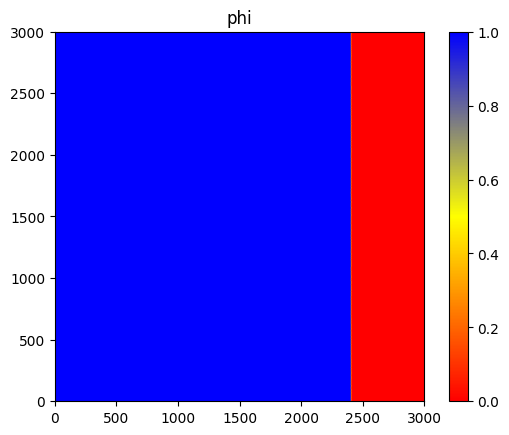

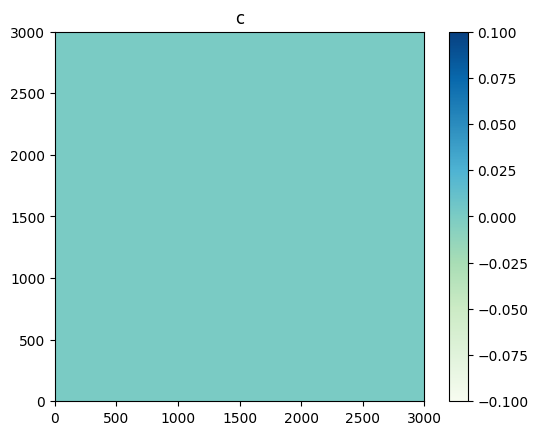

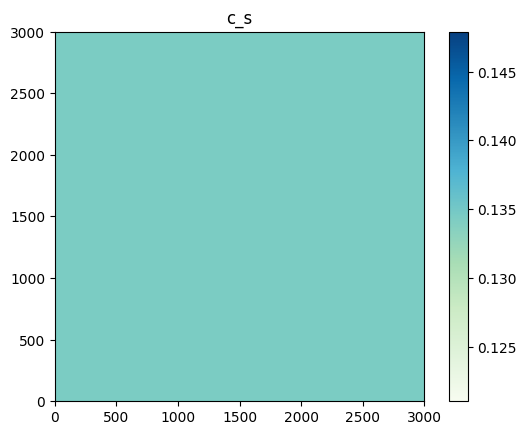

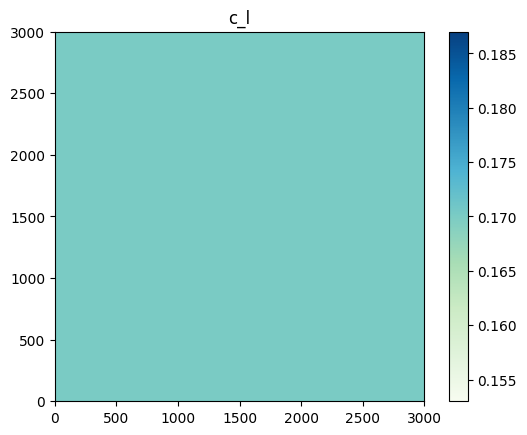

(2999,)
(2999,)


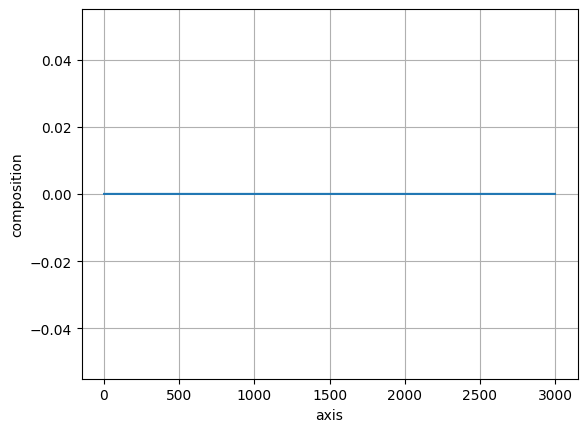

t = 0,at[800,801],phi = 0.5230117193049026, c= 0.0,c_s = 0.13447,c_l =0.17 


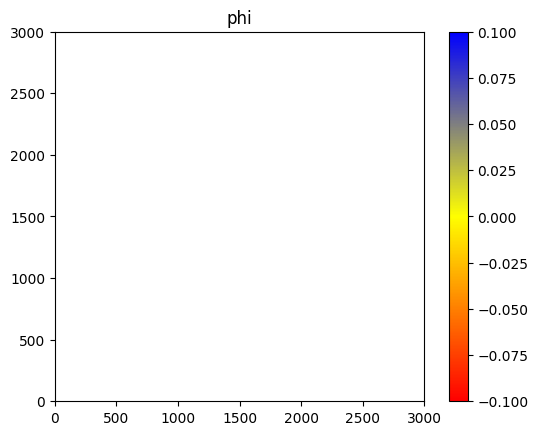

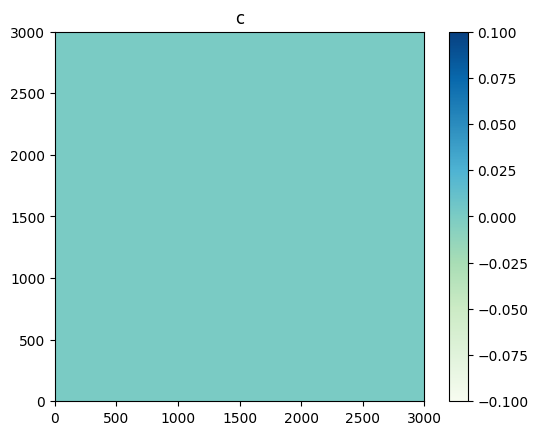

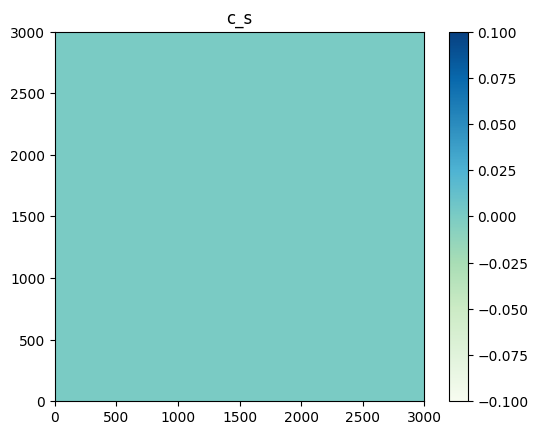

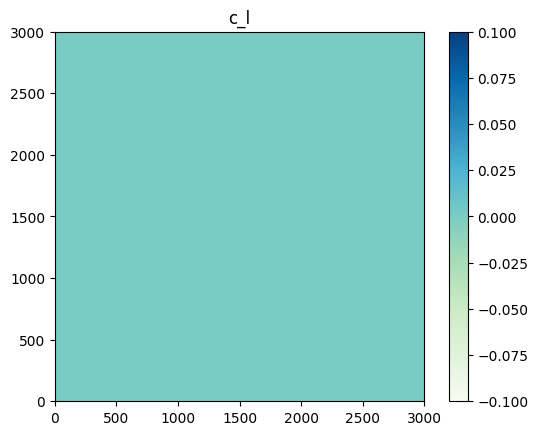

(2999,)
(2999,)


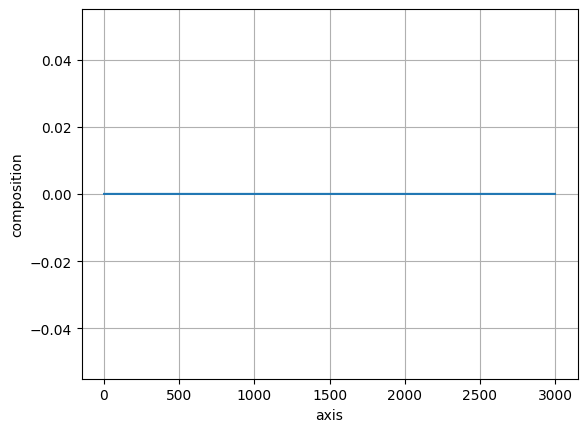

Average time to run later iterations: 22.330474376678467 seconds
Total runtime: 22.330474376678467 seconds for 1 timesteps


In [2]:
sim = run_sim(4e-9,1, 3000,3000)